In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
file_path = 'C:/Users/Administrator/Downloads/Gift_Cards_5.json.gz'

In [13]:
df = pd.read_json(file_path, compression='gzip', lines=True)

In [14]:
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2967,5,True,"07 10, 2018",A1MXZ1CW0ZVTKL,B01DWOZKSC,NaN,Steve,"Not much to say, gift card is as good as cash!",gift card is as good as cash,1531180800,NaN,NaN
2968,4,True,"06 19, 2018",A1SVYJFIASQ46Z,B01DWOZKSC,NaN,Amazon Customer,Nice gift card,Four Stars,1529366400,NaN,NaN
2969,5,True,"06 8, 2018",A1QZ08NSDCZBA3,B01E4QS95I,NaN,Slickdome,Gift,Great Gift,1528416000,NaN,NaN
2970,5,True,"11 10, 2017",A1L4GG3FBMIG6V,B01FERR9FW,{'Gift Amount:': ' 250'},Amazon Customer,Pretty good!,Pretty good!,1510272000,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         2972 non-null   int64  
 1   verified        2972 non-null   bool   
 2   reviewTime      2972 non-null   object 
 3   reviewerID      2972 non-null   object 
 4   asin            2972 non-null   object 
 5   style           864 non-null    object 
 6   reviewerName    2972 non-null   object 
 7   reviewText      2966 non-null   object 
 8   summary         2972 non-null   object 
 9   unixReviewTime  2972 non-null   int64  
 10  vote            208 non-null    float64
 11  image           12 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 258.4+ KB


In [16]:
len(df)

2972

In [17]:
print(df.shape)

(2972, 12)


In [18]:
df.describe()

,overall,unixReviewTime,vote
count,2972.000000,2.972000e+03,208.000000
mean,4.885262,1.476136e+09,5.158654
std,0.484660,3.379616e+07,7.366121
min,1.000000,1.327968e+09,2.000000
25%,5.000000,1.454890e+09,2.000000
50%,5.000000,1.482710e+09,3.000000
75%,5.000000,1.500271e+09,5.000000
max,5.000000,1.534896e+09,60.000000


In [19]:
df.isnull().sum()

overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
style             2108
reviewerName         0
reviewText           6
summary              0
unixReviewTime       0
vote              2764
image             2960
dtype: int64

In [20]:
df = df.drop(columns=['vote', 'image','unixReviewTime', 'reviewTime'])

In [21]:
print(df.shape)

(2972, 8)


In [22]:
print("Unique REVIEWERS in the column:", df['reviewerID'].nunique())

Unique REVIEWERS in the column: 458


In [23]:
reviews_per_user = df['reviewerID'].value_counts()
print(reviews_per_user)

A1U1G73EI5IRZF    32
A13H0YP0J8PM6V    28
A3OHGWD8LIDZ8K    22
A2RTTRR421J9KG    19
A1SVYJFIASQ46Z    19
                  ..
ASJ7USDIR4PL0      5
A3OZ1Q3VI8H8EO     5
AIG7PZQOVH31T      5
A2M5PNYYFWSJMD     5
A2RV5MAIOHKMW0     5
Name: reviewerID, Length: 458, dtype: int64


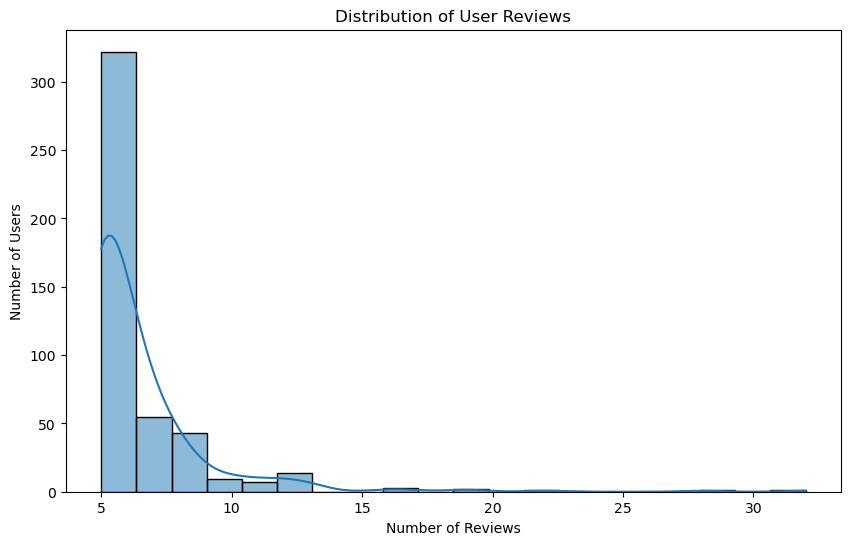

In [24]:
#Distribution 0f USER REVIEWS 
plt.figure(figsize=(10, 6))
sns.histplot(reviews_per_user, bins=20, kde=True)
plt.title('Distribution of User Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.show()


In [32]:
df['overall'].value_counts()


5    2752
4     154
3      33
1      22
2      11
Name: overall, dtype: int64

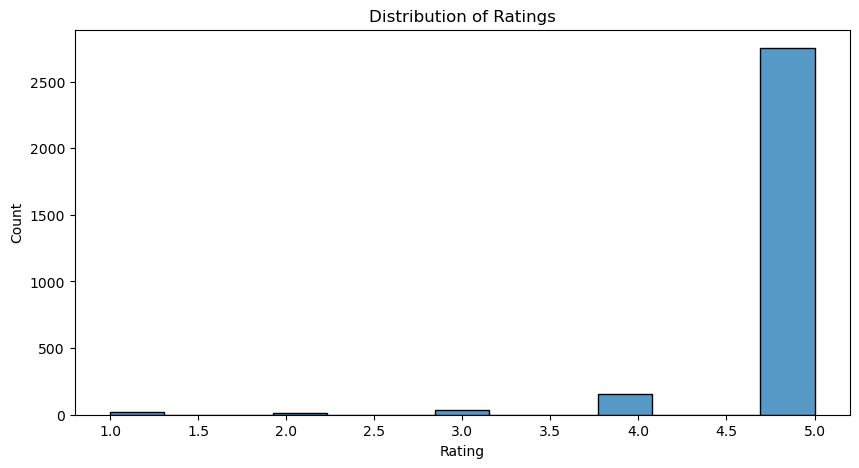

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df['overall'])
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.show()

In [34]:
print("Unique PRODUCTS in the column:", df['asin'].nunique())

Unique PRODUCTS in the column: 148


In [35]:
print("Unique REVIEWERS in the column:", df['reviewerName'].nunique())

Unique REVIEWERS in the column: 429


In [31]:
df

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary
0,5,True,A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars
1,4,True,A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use
2,5,True,A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars
3,5,True,A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards
4,5,True,ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars
...,...,...,...,...,...,...,...,...
2967,5,True,A1MXZ1CW0ZVTKL,B01DWOZKSC,NaN,Steve,"Not much to say, gift card is as good as cash!",gift card is as good as cash
2968,4,True,A1SVYJFIASQ46Z,B01DWOZKSC,NaN,Amazon Customer,Nice gift card,Four Stars
2969,5,True,A1QZ08NSDCZBA3,B01E4QS95I,NaN,Slickdome,Gift,Great Gift
2970,5,True,A1L4GG3FBMIG6V,B01FERR9FW,{'Gift Amount:': ' 250'},Amazon Customer,Pretty good!,Pretty good!


In [36]:
df['asin'].value_counts()

B00AR51Y5I    94
B004Q7CK9M    88
B0091JKVU0    84
B00BXLW5QC    79
B0091JKY0M    73
              ..
B016J1LGPG     5
B01CT5PHJ2     5
B00BXLSPGQ     5
B0188LOK7G     5
B01B25LU7S     4
Name: asin, Length: 148, dtype: int64

In [40]:
# g. Check for duplicates

# Define the columns that uniquely identify a review
unique_cols = ['reviewerID', 'asin','reviewText','reviewerName']

# Find duplicates based on these unique columns. `keep=False` marks all duplicates as True.
duplicates = df[df.duplicated(subset=unique_cols)]

# Count the number of duplicates
num_duplicates = duplicates.count()

# Print the number of duplicates
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: overall         1
verified        1
reviewerID      1
asin            1
style           1
reviewerName    1
reviewText      1
summary         1
dtype: int64


In [39]:
print(duplicates['reviewerID'])
print(duplicates['asin'])
print(duplicates['reviewText'])

79    A2WCRWBZJETE17
Name: reviewerID, dtype: object
79    B004Q7CK9M
Name: asin, dtype: object
79    Good gift for anyone
Name: reviewText, dtype: object


In [41]:
df[(df['reviewerID']=='A2WCRWBZJETE17')&(df['asin']=='B004Q7CK9M')&(df['reviewText']=='Good gift for anyone')]

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary
40,5,True,A2WCRWBZJETE17,B004Q7CK9M,{'Gift Amount:': ' 50'},Jeff Quade,Good gift for anyone,five stars
79,5,True,A2WCRWBZJETE17,B004Q7CK9M,{'Gift Amount:': ' 50'},Jeff Quade,Good gift for anyone,Five Stars


# 2. Pre-processing

In [42]:
#a. Label your data based on the value of “rating of the product”
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['overall'].apply(label_sentiment)

In [43]:
df['sentiment']

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
2967    Positive
2968    Positive
2969    Positive
2970    Positive
2971    Positive
Name: sentiment, Length: 2972, dtype: object

In [44]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

Positive    2906
Negative      33
Neutral       33
Name: sentiment, dtype: int64


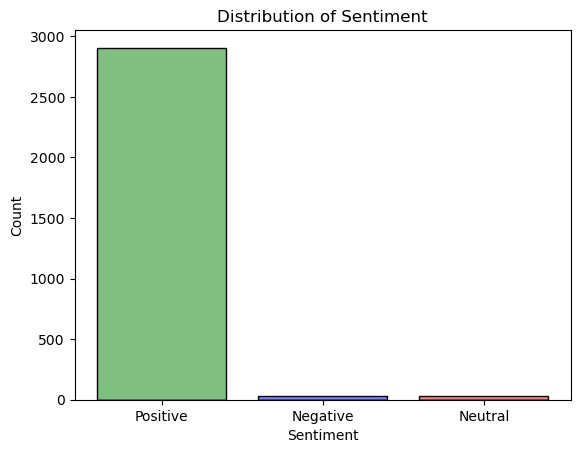

In [45]:
sns.histplot(data=df, x='sentiment', hue='sentiment', palette=['green', 'blue', 'red'], shrink=0.8, legend=False)

plt.title("Distribution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [46]:
# Create a new column "price"
df['price'] = df['style'].apply(lambda x: int(x.get('Gift Amount:', 0)) if isinstance(x, dict) else 0)
# Then now we can drop style column
df = df.drop(columns='style')
df

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,sentiment,price
0,5,True,A31UBHTUUIFJUT,B004LLIKVU,john stoiber,Another great gift.,Five Stars,Positive,50
1,4,True,A2MN5JQMIY0FQ2,B004LLIKVU,Amazon Customer,Gift card for my daughter,Ease of use,Positive,50
2,5,True,A25POI5IGGENPM,B004LLIKVU,Kindle Customer,Nice present,Five Stars,Positive,50
3,5,True,A2HYGTHB4LJ9FW,B004LLIKVU,Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,Positive,50
4,5,True,ACDG3M94UMZGJ,B004LLIKVU,Joan Freesh,fine as a gift.,Five Stars,Positive,50
...,...,...,...,...,...,...,...,...,...
2967,5,True,A1MXZ1CW0ZVTKL,B01DWOZKSC,Steve,"Not much to say, gift card is as good as cash!",gift card is as good as cash,Positive,0
2968,4,True,A1SVYJFIASQ46Z,B01DWOZKSC,Amazon Customer,Nice gift card,Four Stars,Positive,0
2969,5,True,A1QZ08NSDCZBA3,B01E4QS95I,Slickdome,Gift,Great Gift,Positive,0
2970,5,True,A1L4GG3FBMIG6V,B01FERR9FW,Amazon Customer,Pretty good!,Pretty good!,Positive,250


In [49]:
df['price'].value_counts()

0      2242
50      315
25      194
100      77
75       46
20       21
15       14
200      14
150      14
10       12
30       10
40        6
35        3
60        1
300       1
350       1
250       1
Name: price, dtype: int64

In [50]:
df['asin'].value_counts()

B00AR51Y5I    94
B004Q7CK9M    88
B0091JKVU0    84
B00BXLW5QC    79
B0091JKY0M    73
              ..
B016J1LGPG     5
B01CT5PHJ2     5
B00BXLSPGQ     5
B0188LOK7G     5
B01B25LU7S     4
Name: asin, Length: 148, dtype: int64

In [51]:
df['review_length'] = df['reviewText'].apply(lambda x: len(str(x)))

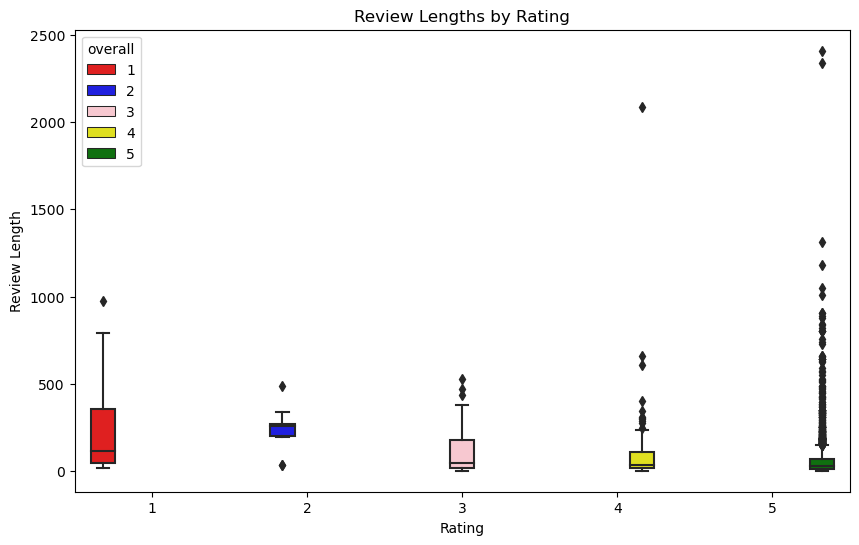

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='overall', y='review_length', data=df, hue="overall", palette =['red','blue','pink','yellow','green'])
plt.title("Review Lengths by Rating")
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.show()

In [53]:
review_length_stats = df['review_length'].describe()
print(review_length_stats)

count    2972.000000
mean       67.337147
std       131.020103
min         2.000000
25%        12.000000
50%        29.000000
75%        72.000000
max      2409.000000
Name: review_length, dtype: float64


In [54]:
df

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,sentiment,price,review_length
0,5,True,A31UBHTUUIFJUT,B004LLIKVU,john stoiber,Another great gift.,Five Stars,Positive,50,19
1,4,True,A2MN5JQMIY0FQ2,B004LLIKVU,Amazon Customer,Gift card for my daughter,Ease of use,Positive,50,25
2,5,True,A25POI5IGGENPM,B004LLIKVU,Kindle Customer,Nice present,Five Stars,Positive,50,12
3,5,True,A2HYGTHB4LJ9FW,B004LLIKVU,Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,Positive,50,48
4,5,True,ACDG3M94UMZGJ,B004LLIKVU,Joan Freesh,fine as a gift.,Five Stars,Positive,50,15
...,...,...,...,...,...,...,...,...,...,...
2967,5,True,A1MXZ1CW0ZVTKL,B01DWOZKSC,Steve,"Not much to say, gift card is as good as cash!",gift card is as good as cash,Positive,0,46
2968,4,True,A1SVYJFIASQ46Z,B01DWOZKSC,Amazon Customer,Nice gift card,Four Stars,Positive,0,14
2969,5,True,A1QZ08NSDCZBA3,B01E4QS95I,Slickdome,Gift,Great Gift,Positive,0,4
2970,5,True,A1L4GG3FBMIG6V,B01FERR9FW,Amazon Customer,Pretty good!,Pretty good!,Positive,250,12


In [56]:
df.head(10)

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,sentiment,price,review_length
0,5,True,A31UBHTUUIFJUT,B004LLIKVU,john stoiber,Another great gift.,Five Stars,Positive,50,19
1,4,True,A2MN5JQMIY0FQ2,B004LLIKVU,Amazon Customer,Gift card for my daughter,Ease of use,Positive,50,25
2,5,True,A25POI5IGGENPM,B004LLIKVU,Kindle Customer,Nice present,Five Stars,Positive,50,12
3,5,True,A2HYGTHB4LJ9FW,B004LLIKVU,Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,Positive,50,48
4,5,True,ACDG3M94UMZGJ,B004LLIKVU,Joan Freesh,fine as a gift.,Five Stars,Positive,50,15
5,5,True,ABWSFKJ1MRN1Q,B004LLIKVU,Barb Peterson,I would have preferred some more choices.,Five Stars,Positive,50,41
6,5,True,A34JP8QRZRS7W5,B004LLIKVU,dood,great,great,Positive,50,5
7,5,True,A2JCUY769II5B5,B004LLIKVU,Stephanie K,Very cute design and enjoyed by recipient.,Five Stars,Positive,50,42
8,4,True,A1MAKKM3E4PFE2,B004LLIKVU,NPR MAN,I used the text option to send these last minu...,"I texted this gift card to my Granddaughter, w...",Positive,50,344
9,5,True,A35NK1PEDWMV0I,B004LLIKVU,Traveler,This was for a gift and it was well received.,Five Stars,Positive,50,45


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19704\2079836357.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


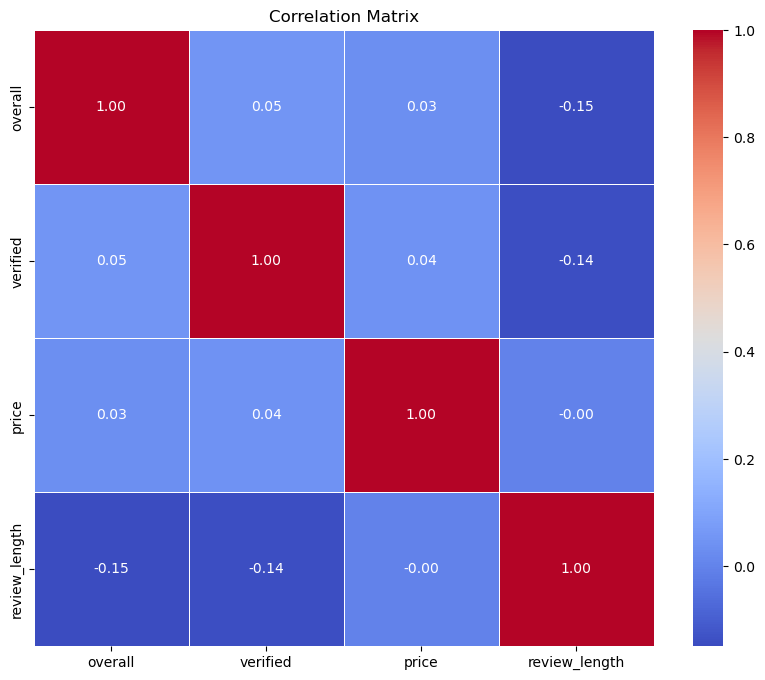

In [57]:
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

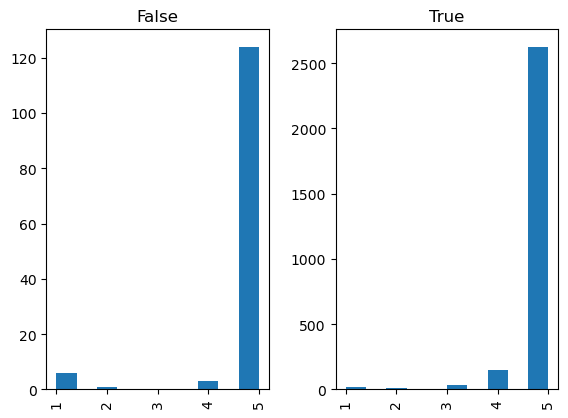

In [58]:
df.hist(column='overall', by='verified')

In [59]:
df['verified'].value_counts()

True     2838
False     134
Name: verified, dtype: int64